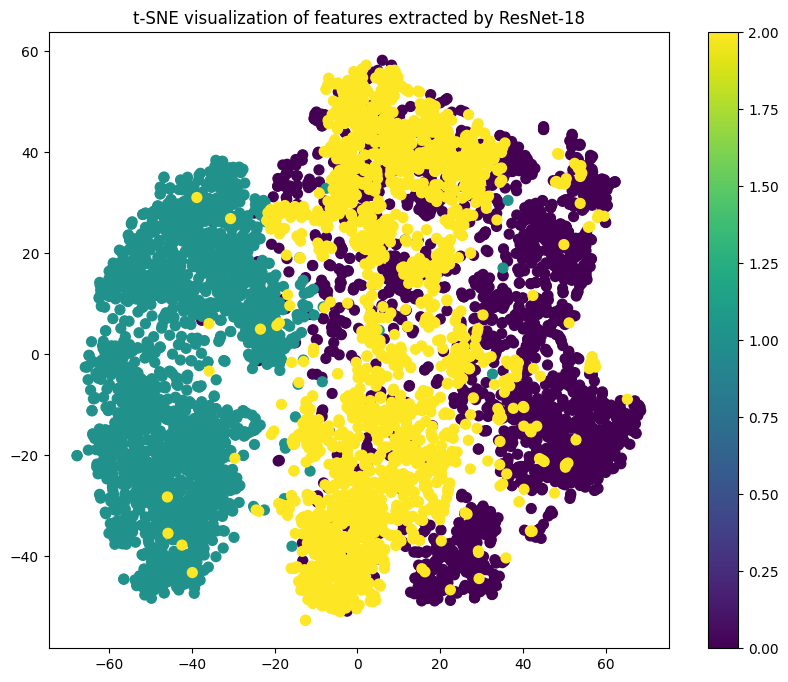

In [ ]:
import torch
from torch import nn
from torchvision import models, transforms, datasets
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

model = models.resnet18(pretrained=True)

model = nn.Sequential(*list(model.children())[:-1])

model.eval()


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset2 = datasets.ImageFolder(root='./ColorectalCancer', transform=transform)

data_loader = DataLoader(dataset2, batch_size=32, shuffle=False)

def extract_features(model, data_loader, device):
    features = []
    labels = []
    with torch.no_grad():
        for inputs, target in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)  
            outputs = outputs.view(outputs.size(0), -1)   
            features.append(outputs.cpu().numpy())  
            labels.append(target.cpu().numpy()) 
    features = np.concatenate(features, axis=0)
    labels = np.concatenate(labels, axis=0)
    return features, labels


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

features2, labels2 = extract_features(model, data_loader, device)

tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(features2)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels2, cmap='viridis', s=50)
plt.colorbar()
plt.title("t-SNE visualization of features extracted by ResNet-18")
plt.show()
